# Simple UI Design using PYQT5 for plotting data

UI is the most essential medium of communication between the user/client with the product. UI gives the first impression and the usability of the program. The simpler the UI, The easier to use. In this notebook we, a basic UI is being built, which will be able to upload a dataset and plot the curve of the data. The plot should contain all the basic functionalities like zoom function,etc.  

### Loading packages

The packages required for this building this UI are as follows:
1) sys, os: to read the system path of the data and provide inbuilt system functionalities like execute.<br>
2) pandas: to read and convert the data into a Data Frame.<br>
3) numpy: to perform some numerical functionalities.<br>
4) matplotlib: to plot and visualize the data.<br>
5) PyQt5: to create the UI and manage layouts.

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import random
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
from matplotlib.figure import Figure
from PyQt5 import QtCore, QtWidgets, QtGui
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QFileDialog, QTableWidget, QMessageBox
from PyQt5.QtCore import *
from PyQt5.QtWidgets import QGroupBox, QVBoxLayout, QStatusBar, QAction, QLineEdit, QLabel, QComboBox
from PyQt5.QtGui import *
matplotlib.use('Qt5Agg')
plt.style.use('seaborn-white')

### Creating a Matplotlib figure canvas class

The class named MplCanvas initializes a matplotlib figure canvas with default dimensions (5,4). It initializes the figure when an object of this class is created.

In [2]:
class MplCanvas(FigureCanvasQTAgg):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        self.fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = self.fig.add_subplot(111)
        super(MplCanvas, self).__init__(self.fig)

### Creating the main UI window

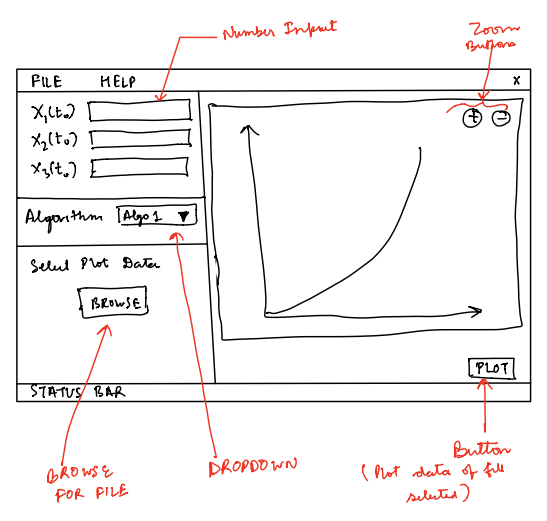

The above mentioned picture is the rough diagram of the main UI_Window. The Ui_MainWindow class handles the layout and positioning of the widgets.

In [3]:
class Ui_MainWindow(QtWidgets.QWidget):
    def __init__(self,  parent):
        super(Ui_MainWindow, self).__init__(parent)
        self.setFixedWidth(600)
        self.setFixedHeight(490)
        
        lay = QtWidgets.QGridLayout(self)
        lay.addWidget(self.createPlotGroup(),1,1,4,4)
        lay.addWidget(self.createInputGroup(),1,0)
        lay.addWidget(self.createAlgoGroup(),2,0)
        lay.addWidget(self.createBrowseGroup(),4,0)
        self.show()
    
    def createAlgoGroup(self):
        groupBox = QGroupBox("")
        label = QLabel()
        label.setText("ALGORITHM")
        label.setStyleSheet("font-size: 15px; color: #686b6e")
        cb = QComboBox()
        cb.addItems(["Algorithm 1", "Algorithm 2", "Algorithm 3"])
        cb.setStyleSheet("border: 1px solid gray;border-radius: 3px;padding: 10px 40px;font-size: 13px")
        
        
        vb = QVBoxLayout()
        vb.addWidget(label)
        vb.addWidget(cb)
        
        groupBox.setLayout(vb)
        return groupBox
    
    def createInputGroup(self):
        groupBox = QGroupBox()
        label1 = QLabel()
        label2 = QLabel()
        label3 = QLabel()
        
        label1.setText("X1")
        label2.setText("X2")
        label3.setText("X3")
        
        self.t1 = QLineEdit()
        self.t2 = QLineEdit()
        self.t3 = QLineEdit()
        
        button = QtWidgets.QPushButton("SUBMIT")
        button.clicked.connect(self.takeInput)
        
        label1.setStyleSheet("font-family: 'Helvetica'; color: #686b6e; font-size: 12px")
        label2.setStyleSheet("font-family: 'Helvetica'; color: #686b6e; font-size: 12px")
        label3.setStyleSheet("font-family: 'Helvetica'; color: #686b6e; font-size: 12px")
        
        button.setStyleSheet("QPushButton"
                              "{"
                            "background-color: #e7e7e7;"
                            "color: black;"
                            "font-family: 'Helvetica';"
                            "font-size: 15px;"
                                  "}"
                                "QPushButton::hover"
                                "{"
                                "background-color : #7bd4b8;"
                                "}") 
        
        grid = QtWidgets.QGridLayout()
        grid.addWidget(label1,0,0)
        grid.addWidget(self.t1, 0,1)
        grid.addWidget(label2,1,0)
        grid.addWidget(self.t2, 1,1)
        grid.addWidget(label3,2,0)
        grid.addWidget(self.t3, 2,1)
        grid.addWidget(button,3,0,3,2)
        
        groupBox.setLayout(grid)
        return groupBox
    
    def takeInput(self):
        t1p = self.t1.text()
        t2p = self.t2.text()
        t3p = self.t3.text()
        
        msg = QMessageBox()
        msg.setText("text1: "+str(t1p)+ "\ntext2: "+str(t2p)+"\ntext3: "+str(t3p))
        msg.setStandardButtons(QMessageBox.Ok)
        msg.exec_()
        
        self.t1.setText("")
        self.t2.setText("")
        self.t3.setText("")
        
    def createBrowseGroup(self):
        groupBox = QGroupBox()
        label = QLabel()
        label.setText("SELECT PLOTTING DATA")
        label.setStyleSheet("font-size: 15px; color: #686b6e")
        button2 = QtWidgets.QPushButton("LOAD DATA")
        button2.clicked.connect(self.read_data)
        button2.setStyleSheet("QPushButton"
                              "{"
                            "background-color: #e7e7e7;"
                            "color: black;"
                            "padding: 14px 40px;"
                            "font-family: 'Helvetica';"
                            "font-size: 15px;"
                                  "}"
                                "QPushButton::hover"
                                "{"
                                "background-color : #7bd4b8;"
                                "}") 
        vbox = QVBoxLayout()
        vbox.addWidget(label)
        vbox.addWidget(button2)
        groupBox.setLayout(vbox)
        return groupBox
    
    def createPlotGroup(self):
        groupBox = QtWidgets.QGroupBox()
        self.sc = MplCanvas(self, width=6, height=5, dpi=100)
        toolbar = NavigationToolbar(self.sc, self)
        self.sc.setSizePolicy(QtWidgets.QSizePolicy.Expanding, QtWidgets.QSizePolicy.Expanding)
        button1 = QtWidgets.QPushButton("PLOT")
        button1.setStyleSheet("QPushButton"
                              "{"
                            "background-color: #e7e7e7;"
                            "color: black;"
                            "padding: 14px 40px;"
                            "font-family: 'Helvetica';"
                            "font-size: 20px;"
                                  "}"
                                "QPushButton::hover"
                                "{"
                                "background-color : #7bd4b8;"
                                "}")
        button2 = QtWidgets.QPushButton("REFRESH")
        button2.setStyleSheet("QPushButton"
                              "{"
                            "background-color: #e7e7e7;"
                            "color: black;"
                            "padding: 14px 40px;"
                            "font-family: 'Helvetica';"
                            "font-size: 20px;"
                                  "}"
                                "QPushButton::hover"
                                "{"
                                "background-color : #7bd4b8;"
                                "}")
        button1.clicked.connect(self.plot)
        button2.clicked.connect(self.refresh)
        
        layout1 = QVBoxLayout()
        layout1.addWidget(toolbar, alignment=QtCore.Qt.AlignCenter)
        layout1.addWidget(self.sc)
        widget = QtWidgets.QWidget()
        widget.setLayout(layout1)
        
        vbox = QtWidgets.QGridLayout()
        vbox.addWidget(widget,0,0,2,2)
        vbox.addWidget(button2, 3,0)
        vbox.addWidget(button1,3,1)
        groupBox.setLayout(vbox)
        groupBox.setStyleSheet("background-color: white;border-radius: 3px;color: #84918d;")
        return groupBox
    
    def refresh(self):
        self.sc.axes.cla()
    
    def plot(self):
        try:
            self.sc.axes.plot(self.x,self.y)
            self.sc.axes.set_xlim(min(self.x),max(self.x))
            self.sc.axes.set_title("PLOT")
            self.sc.draw()
        except:
            msg = QMessageBox()
            msg.setText("Invalid Data")
            msg.setInformativeText("Please upload a data file...")
            msg.setStandardButtons(QMessageBox.Ok)
            msg.exec_()
            
    def read_data(self):
        path = QFileDialog.getOpenFileName(self, 'Open CSV', os.getenv('HOME'), 'CSV(*.csv)')
        try:
            df = pd.read_csv(path[0])
            self.x = df['x'].values
            self.y = df['y'].values
        except:
            msg = QMessageBox()
            msg.setText("Invalid Path")
            msg.setInformativeText("Please select a valid path...")
            msg.setStandardButtons(QMessageBox.Ok)
            msg.exec_()
        #print(self.x,self.y)
        #return x,y
    
    

### Creating the main window

The main/parent window class is created with functionalities like the menubar and status bar. This window holds the Ui_window as the central widget.

In [4]:
class MainWindow(QtWidgets.QMainWindow):
    def __init__(self, parent = None):
        super(MainWindow, self).__init__(parent)
        self.setFixedWidth(600)
        self.setFixedHeight(530)
        
        mainMenu = self.menuBar()
        fileMenu = mainMenu.addMenu('File')
        helpMenu = mainMenu.addMenu('Help')
        
        exitButton = QAction('Exit', self)
        exitButton.setShortcut('Ctrl+Q')
        exitButton.setStatusTip('Exit application')
        exitButton.triggered.connect(self.close)
        fileMenu.addAction(exitButton)
        
        self.setWindowTitle("Graph plot")
        
        self.Ui = Ui_MainWindow(self)
        self.setCentralWidget(self.Ui)
        
        statusBar = QStatusBar()
        self.setStatusBar(statusBar)
        statusBar.showMessage('STATUS BAR')
        statusBar.setStyleSheet("background-color: #d9d9d9;")

### Executing the classes with some background design using QPallete

In [5]:
app = QtCore.QCoreApplication.instance()
if app is None:
    app = QtWidgets.QApplication(sys.argv)
w = MainWindow()
p = QPalette()
gradient = QLinearGradient(0, 0, 0, 400)
gradient.setColorAt(0.0, QColor(191, 222, 138))
gradient.setColorAt(1.0, QColor(136, 203, 209))
p.setBrush(QPalette.Window, QBrush(gradient))
w.setPalette(p)
w.show()
app.exec_()

0